In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\project\Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Preprocessing

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df.drop(columns='customerID', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### EDA

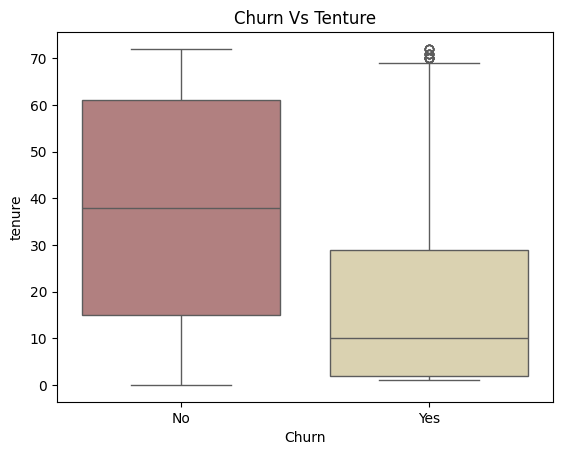

In [19]:
# churn vs tenture
plt.Figure(figsize=(4,2))
sns.boxplot(x='Churn', y='tenure', data=df, palette='pink')
plt.title("Churn Vs Tenture")
plt.show()

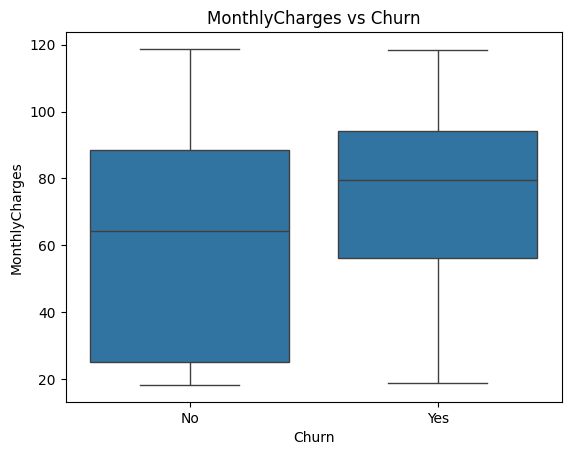

In [20]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.show()

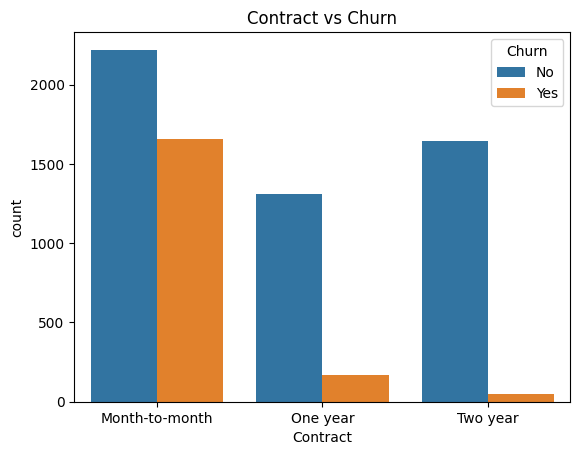

In [26]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract vs Churn")
plt.show()

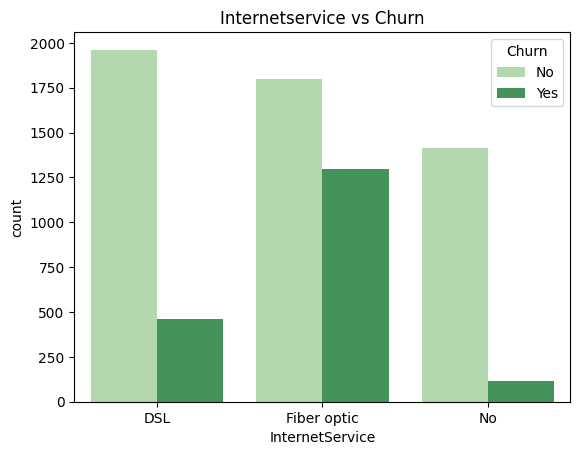

In [42]:
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Greens')
plt.title('Internetservice vs Churn')
plt.show()

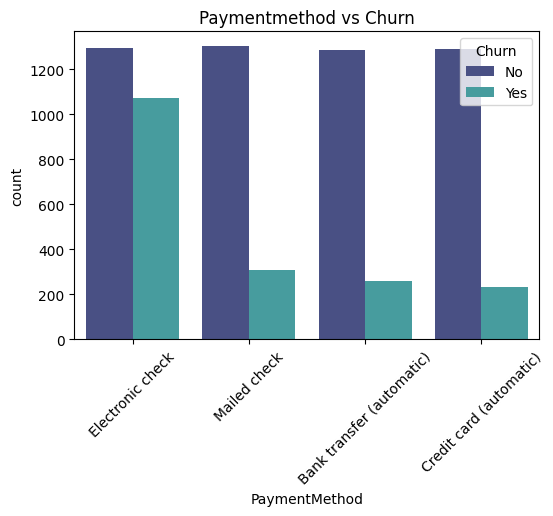

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='mako')
plt.xticks(rotation=45)
plt.title('Paymentmethod vs Churn')
plt.show()

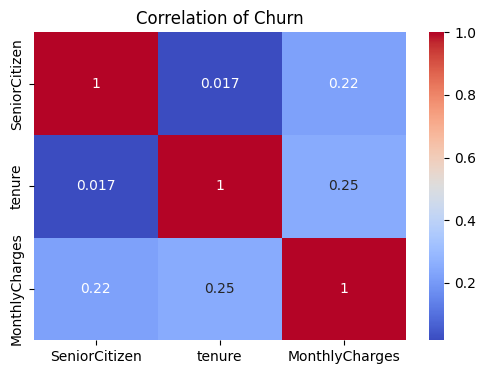

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation of Churn")
plt.show()

#### Encoding the columns

In [12]:
replace_cols=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in replace_cols:
    df[col]=df[col].replace('No internet service', 'No')

In [13]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service', 'No')

In [14]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [15]:
# Binary encoding
binary_cols=['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'MultipleLines']

for cols in binary_cols:
    df[cols]=df[cols].map({'No':0, 'Yes':1})

In [16]:
df['gender']=df['gender'].map({'Female':0, 'Male':1})

In [17]:
# one-hot encoding for the remaining cols:
df=pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


#### Feature selection

In [19]:
X=df.drop(columns=['Churn'])
y=df['Churn']

#### Train and Test Dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

#### Prediction

In [23]:
y_pred=log_reg.predict(X_test_scaled)
y_prob=log_reg.predict_proba(X_test_scaled)[:, 1]

#### Evaluate the model

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Roc:", roc_auc_score(y_test, y_pred))

print("classfication report:", classification_report(y_test, y_pred))
print("confusion matrix:", confusion_matrix(y_test, y_pred))

Accuracy: 0.7402413058907026
Roc: 0.7548838771345165
classfication report:               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

confusion matrix: [[749 286]
 [ 80 294]]


In [25]:
import pickle
with open ("churn_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

with open ("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

feature_names=X.columns

with open ("feature_names.pkl", "wb") as file:
    pickle.dump(feature_names, file)

#### Random Forest Regression

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500, min_samples_split=10, min_samples_leaf=5, 
                          max_depth=None, class_weight='balanced', random_state=42, n_jobs=1)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=500, n_jobs=1,
                       random_state=42)

In [203]:
y_pred_rf=rf.predict(X_test)
y_prob_rf=rf.predict_proba(X_test)[:, 1]

In [204]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Roc:", roc_auc_score(y_test, y_pred_rf))

print("classfication report:", classification_report(y_test, y_pred_rf))
print("confusion matrix:", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7679205110007097
Roc: 0.7549407114624506
classfication report:               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

confusion matrix: [[810 225]
 [102 272]]


#### Conclusion

##### Logistic Regression is achieved the higher churn recall while random forest improved overall accuracy.